## Life expectancy

<b>Life expectancy can be defined as the average of additional years a given person still has to live. It is calculated by observing a given population born in the same year, during a certain period. For such a group of people, referred to (in this case) as a cohort, the probability of survival is the proportion of individuals to be alive after a given time.</b>

<b>This is an exploratory analysis designed to observe the impact of factors such as income, education, ancestry, gender and residence type, on life expectancy. The data used in this work contains the life expectancy and probability of survival calculated for a given cohort from 1991 to 2001. The dataset is available on the [Canadian Government website](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1310013401).</b>

<b>Download [dataset](https://www150.statcan.gc.ca/n1/tbl/csv/13100134-eng.zip)</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data exploration

In [2]:
# Let's explore
life_table = pd.read_csv('Data/13100134.csv')
#print(life_table.head())
print(life_table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   REF_DATE          2394 non-null   object 
 1   GEO               2394 non-null   object 
 2   DGUID             2394 non-null   object 
 3   Population group  2394 non-null   object 
 4   Age               2394 non-null   object 
 5   Sex               2394 non-null   object 
 6   Characteristics   2394 non-null   object 
 7   UOM               2394 non-null   object 
 8   UOM_ID            2394 non-null   int64  
 9   SCALAR_FACTOR     2394 non-null   object 
 10  SCALAR_ID         2394 non-null   int64  
 11  VECTOR            2394 non-null   object 
 12  COORDINATE        2394 non-null   object 
 13  VALUE             2394 non-null   float64
 14  STATUS            0 non-null      float64
 15  SYMBOL            0 non-null      float64
 16  TERMINATED        0 non-null      float64


In [3]:
# Checking for missing values
life_table.isna().any()

REF_DATE            False
GEO                 False
DGUID               False
Population group    False
Age                 False
Sex                 False
Characteristics     False
UOM                 False
UOM_ID              False
SCALAR_FACTOR       False
SCALAR_ID           False
VECTOR              False
COORDINATE          False
VALUE               False
STATUS               True
SYMBOL               True
TERMINATED           True
DECIMALS            False
dtype: bool

<b>Some features are not particularly needed for this analysis and can be dropped. Items in the "*VALUE*" column correspond to values of the Life expectancy and its margin errors. Population group column contains information on the entire cohort, the income, education, residence and ancestry</b>

In [4]:
print(life_table['Population group'].unique())

['Entire cohort' 'Income adequacy quintile 1 (lowest)'
 'Income adequacy quintile 2' 'Income adequacy quintile 3'
 'Income adequacy quintile 4' 'Income adequacy quintile 5 (highest)'
 'Educational attainment - less than secondary graduation'
 'Educational attainment - secondary graduation'
 'Educational attainment - postsecondary diploma'
 'Educational attainment - university degree'
 'Resident of shelter or rooming house or hotel' 'Hotel' 'Rooming house'
 'Shelter' 'First Nations' 'Registered Indian' 'Non-Status Indian'
 'Métis ancestry' 'Non-Aboriginal']


In [5]:
# Select needed columns and rewrite Ages
observables = ['Population group','Age','Sex','Characteristics','VALUE']
new_life_table = life_table.loc[:, observables].replace(r"At | years", '', regex=True)
print(new_life_table.head())

  Population group Age         Sex  \
0    Entire cohort  25  Both sexes   
1    Entire cohort  25  Both sexes   
2    Entire cohort  25  Both sexes   
3    Entire cohort  25       Males   
4    Entire cohort  25       Males   

                                 Characteristics  VALUE  
0                                Life expectancy   55.2  
1   Low 95% confidence interval, life expectancy   55.2  
2  High 95% confidence interval, life expectancy   55.3  
3                                Life expectancy   52.6  
4   Low 95% confidence interval, life expectancy   52.5  


In [6]:
# Making changes in Age column
#life_expectancy['Age'] = life_expectancy['Age'].replace(r"At | years", '', regex=True)

# reset the index
#survival_age = survival.set_index("Age")

#life_expectancy.head()

In [7]:
#Going to drop the error margin here
characteristics = new_life_table['Characteristics'].unique().tolist()

life_expectancy = new_life_table.loc[new_life_table.Characteristics == characteristics[0]].rename(
    columns={'VALUE': 'Life expectancy'}).drop(columns='Characteristics').reset_index(drop=True)

# in case we need to add the error margin
#life_expectancy['Low margin'] = new_life_table.loc[new_life_table['Characteristics'] == 
                                                   #characteristics[1]].reset_index()['VALUE']
#life_expectancy['High margin'] = new_life_table.loc[new_life_table['Characteristics'] == 
                                                   # characteristics[2]].reset_index()['VALUE']
print(life_expectancy.head())


  Population group Age         Sex  Life expectancy
0    Entire cohort  25  Both sexes             55.2
1    Entire cohort  25       Males             52.6
2    Entire cohort  25     Females             57.9
3    Entire cohort  30  Both sexes             50.4
4    Entire cohort  30       Males             47.8


### Life expectancy for entire cohort by age and gender

In [8]:
#life expectancy by age 
life_expect_age = life_expectancy.loc[life_expectancy.Sex=="Both sexes"].rename(
    columns={"Life expectancy": "Both sexes LE"}).drop(columns="Sex").reset_index(drop=True)

life_expect_age["Male LE"] = life_expectancy.loc[life_expectancy.Sex==
                                              "Males"].reset_index()["Life expectancy"]
life_expect_age["Female LE"] = life_expectancy.loc[life_expectancy.Sex==
                                                "Females"].reset_index()["Life expectancy"]
life_expect_age.head()


,Population group,Age,Both sexes LE,Male LE,Female LE
0,Entire cohort,25,55.2,52.6,57.9
1,Entire cohort,30,50.4,47.8,53.0
2,Entire cohort,35,45.6,43.1,48.1
3,Entire cohort,40,40.8,38.3,43.3
4,Entire cohort,45,36.1,33.7,38.5


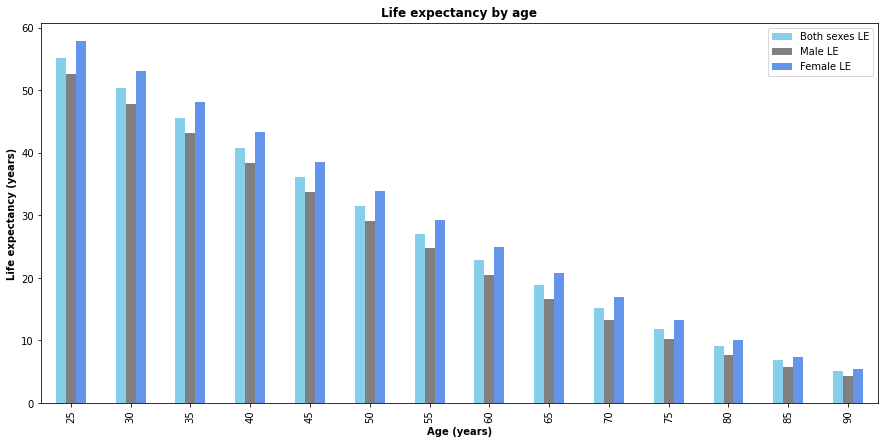

In [9]:
fig2, ax2 = plt.subplots(figsize=(15, 7))
style1 = ['skyblue', 'grey', 'cornflowerblue']
life_plot = life_expect_age.loc[life_expect_age['Population group'] == "Entire cohort"]
life_plot.plot.bar(x="Age", y=["Both sexes LE", "Male LE", "Female LE"], 
                                  color=style1, ax=ax2)
ax2.set_ylabel("Life expectancy (years)", fontweight='bold')
ax2.set_xlabel("Age (years)", fontweight='bold')
ax2.set_title("Life expectancy by age", fontweight='bold')
sticks = ['Low income', 'Non-graduate', 'Shelter', 'Non-arboriginal']

#fig.savefig("Life_expectancy.png")

### <u>Observation:</u>
<b>A general observation is that for this cohort, the life expectancy of women is higher than that of men for all ages. At a given age, the life expectancy corresponds to the average number of years still to live. For example, a 45 year old lady will have Approximately 40 more years</b>

### Life expectancy base on ancestry at 25

In [10]:
ancestry = ['First Nations', 'Registered Indian', 'Non-Status Indian', 'Métis ancestry',  'Non-Aboriginal']
group = life_expect_age.groupby('Population group')

by_ancestry = pd.concat([group.get_group(item) for item in ancestry]).reset_index(drop=True)
by_ancestry = by_ancestry.loc[by_ancestry['Age']=="25"].reset_index(drop=True)
print(by_ancestry.head())

    Population group Age  Both sexes LE  Male LE  Female LE
0      First Nations  25           49.1     47.0       51.3
1  Registered Indian  25           49.0     46.9       51.1
2  Non-Status Indian  25           50.7     48.1       53.3
3     Métis ancestry  25           50.5     48.5       52.5
4     Non-Aboriginal  25           55.4     52.7       58.1


Text(0.5, 1.0, 'Life expectancy based on ancestry')

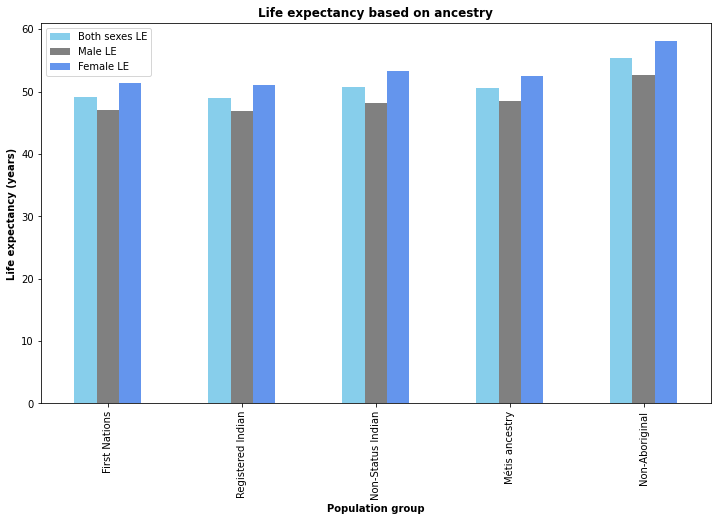

In [11]:
fig, ax = plt.subplots(figsize=(12, 7))
style1 = ['skyblue', 'grey', 'cornflowerblue']
by_ancestry.plot.bar(x="Population group", y=["Both sexes LE", "Male LE", "Female LE"], 
                                  color=style1, ax=ax)
ax.set_ylabel("Life expectancy (years)", fontweight='bold')
ax.set_xlabel("Population group", fontweight='bold')
ax.set_title("Life expectancy based on ancestry", fontweight='bold')

#fig.savefig("Probability_survival_ancestry.jpg")

### Life expectancy by income level

In [12]:
income = ['Income adequacy quintile 1 (lowest)', 'Income adequacy quintile 2', 'Income adequacy quintile 3',
            'Income adequacy quintile 4', 'Income adequacy quintile 5 (highest)']
group = life_expectancy.groupby('Population group')

income_stat = pd.concat([group.get_group(item) for item in income]).reset_index(drop=True)

by_income = income_stat.loc[income_stat['Population group']==income[0]].rename(
    columns={"Life expectancy": 'Income adequacy quintile 1 (lowest)'}).drop(
    columns="Population group").reset_index(drop=True)

for i in range(1,len(income)):
    by_income[income[i]] = income_stat.loc[income_stat['Population group']==
                                              income[i]].reset_index()["Life expectancy"]
    
print(by_income.head())


  Age         Sex  Income adequacy quintile 1 (lowest)  \
0  25  Both sexes                                 51.6   
1  25       Males                                 48.2   
2  25     Females                                 55.0   
3  30  Both sexes                                 46.9   
4  30       Males                                 43.6   

   Income adequacy quintile 2  Income adequacy quintile 3  \
0                        54.4                        55.7   
1                        51.4                        52.9   
2                        57.4                        58.5   
3                        49.6                        50.9   
4                        46.7                        48.1   

   Income adequacy quintile 4  Income adequacy quintile 5 (highest)  
0                        56.6                                  57.6  
1                        53.9                                  55.3  
2                        59.2                                  59.9  
3   

Text(0.5, 1.0, '')

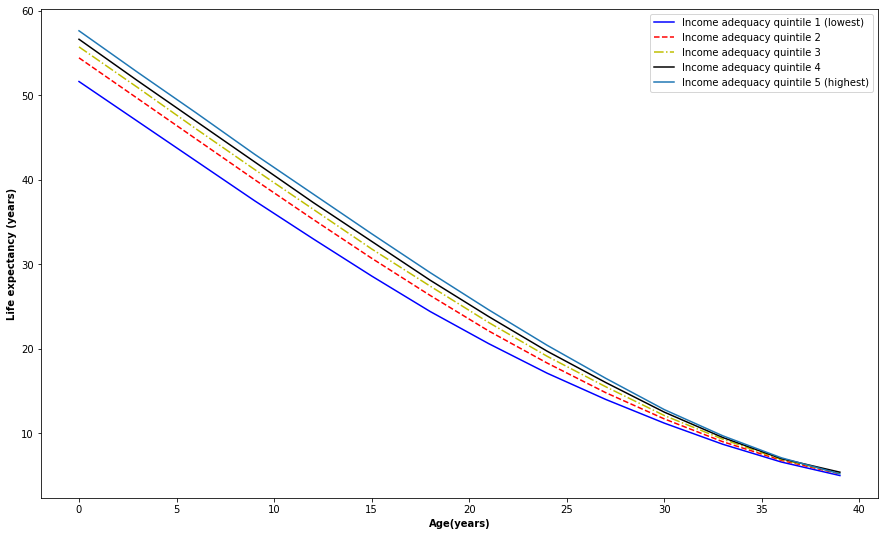

In [13]:
both_sexes = by_income.loc[by_income.Sex == "Both sexes"]
#print(both_sexes.head())
fig, ax1 = plt.subplots(figsize=(15, 9))
style2 = ['b-','r--','y-.', 'k']
both_sexes.plot(style=style2, ax=ax1)

ax1.set_ylabel("Life expectancy (years)", fontweight='bold')
ax1.set_xlabel("Age(years)", fontweight='bold')
ax1.set_title("")